In [ ]:
import multiprocessing
import gensim.models
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import pandas as pd
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import re
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#Load dataset - SST5

train_dataset = pd.read_csv('./train.txt', sep="\t", header=None, names=["label", "data"])
validation_dataset = pd.read_csv('./dev.txt', sep="\t", header=None, names=["label", "data"])
test_dataset = pd.read_csv('./test.txt', sep="\t", header=None, names=["label", "data"])

In [ ]:
#Get the number of classes
n_classes = train_dataset['label'].nunique()
print('N classes: ', n_classes)

N classes:  5


In [ ]:
train_dataset['label'].value_counts()

4    2322
2    2218
3    1624
5    1288
1    1092
Name: label, dtype: int64

In [ ]:
balanced_train_dataset = train_dataset.groupby('label')
balanced_train_dataset = balanced_train_dataset.apply(lambda x: x.sample(balanced_train_dataset.size().min()).reset_index(drop=True))
balanced_train_dataset['label'].value_counts()

1    1092
2    1092
3    1092
4    1092
5    1092
Name: label, dtype: int64

In [ ]:
train_dataset = balanced_train_dataset

In [ ]:
#Clean the 
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

sents = []

for review in train_dataset.data:

    dummy = [re.sub(r'[^a-zA-Z0-9_-]', '', token) for token in review.split() if token not in stop_words]
    dummy = [ s for s in dummy if len(s) > 1]
    sents.append(dummy)
    continue

    cleaned_sentence = [lemmatizer.lemmatize(re.sub(r'[^a-zA-Z0-9_-]', '', token.lower())) for token in review.split() if token not in stop_words]
    cleaned_sentence = [ s for s in cleaned_sentence if len(s) > 1]
    sents.append(cleaned_sentence)

for review in validation_dataset.data:

    dummy = [re.sub(r'[^a-zA-Z0-9_-]', '', token) for token in review.split() if token not in stop_words]
    dummy = [ s for s in dummy if len(s) > 1]
    sents.append(dummy)
    continue

    cleaned_sentence = [lemmatizer.lemmatize(re.sub(r'[^a-zA-Z0-9_-]', '', token.lower())) for token in review.split() if token not in stop_words]
    cleaned_sentence = [ s for s in cleaned_sentence if len(s) > 1]
    sents.append(cleaned_sentence)

for review in test_dataset.data:

    dummy = [re.sub(r'[^a-zA-Z0-9_-]', '', token) for token in review.split() if token not in stop_words]
    dummy = [ s for s in dummy if len(s) > 1]
    sents.append(dummy)
    continue

    cleaned_sentence = [lemmatizer.lemmatize(re.sub(r'[^a-zA-Z0-9_-]', '', token.lower())) for token in review.split() if token not in stop_words]
    cleaned_sentence = [ s for s in cleaned_sentence if len(s) > 1]
    sents.append(cleaned_sentence)



In [ ]:
print(len(sents), sents[0])

8771 ['What', 'remains', 'variant', 'nincompoop', 'Benigni', 'persona', 'annoying', 'though', 'less', 'angry', 'version', 'irresponsible', 'Sandlerian', 'manchild', 'undercut', 'voice', 'star', 'Road', 'Trip']


In [ ]:
from gensim.models.phrases import Phrases, Phraser

bigram = Phrases(sents, min_count=1, progress_per=1000, threshold = 2)
sentences = bigram[sents]


/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
sentences = sents

In [ ]:
cores = multiprocessing.cpu_count()

In [ ]:
!wget -O GoogleNews-vectors-negative300.bin.gz -c "http://vectors.nlpl.eu/repository/11/1.zip"

--2022-12-01 17:21:50--  http://vectors.nlpl.eu/repository/11/1.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5700887510 (5.3G) [application/zip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   5.31G  23.2MB/s    in 4m 0s   

2022-12-01 17:25:51 (22.6 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [5700887510/5700887510]



In [ ]:
!unzip GoogleNews-vectors-negative300.bin.gz -d GoogleNews.bin.gz

Archive:  GoogleNews-vectors-negative300.bin.gz
  inflating: GoogleNews.bin.gz/meta.json  
  inflating: GoogleNews.bin.gz/model.bin  
  inflating: GoogleNews.bin.gz/model.txt  
  inflating: GoogleNews.bin.gz/README  


In [ ]:
# w2v_model = Word2Vec(min_count=5,
#                      window=4,
#                      size=300,
#                      sample=6e-5, 
#                      alpha=0.03, 
#                      min_alpha=0.0007, 
#                      negative=20,
#                      sg = 1, #For skipgram model
#                      workers=cores-1)

#Another approach

w2v_model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews.bin.gz/model.bin", binary=True)
w2v_model.init_sims(replace=True)


In [ ]:
# We don't need to build the vocab, is already done
# w2v_model.build_vocab(sentences, progress_per=1000)

In [ ]:
#we don't need to Train model
# w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

In [ ]:
# w2v_model.wv.vocab
# w2v_model.wv['new']

In [ ]:
vocab = [w.split('_')[0]for w in w2v_model.vocab.keys()] 
# w2v_model.vocab
print(vocab[0:10], len(vocab))

['</s>', 'in', 'for', 'that', 'is', 'on', 'The', 'with', 'said', 'was'] 2883863


In [ ]:
vector_dict = {k.split('_')[0] : w2v_model.syn0norm[w2v_model.vocab[k].index] for k, v in w2v_model.vocab.items()}

<ipython-input-19-cf7da87712dd>:1: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  vector_dict = {k.split('_')[0] : w2v_model.syn0norm[w2v_model.vocab[k].index] for k, v in w2v_model.vocab.items()}


In [ ]:
w2v_model.vocab

In [ ]:
w2v_model.syn0norm[w2v_model.vocab['living_VERB'].index].shape

<ipython-input-21-341c824846b3>:1: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  w2v_model.syn0norm[w2v_model.vocab['living_VERB'].index].shape


(300,)

In [ ]:
len(sents)

8771

In [ ]:
#Build numpy vectors for each dataset

embeddings = np.zeros((len(train_dataset) + len(validation_dataset) + len(test_dataset), 300))

for i, sent in enumerate(sents):
# for i, sent in enumerate(sentences):

    if i % 100 == 0:
        print(i)

    review_array = np.zeros((300,))
    found = 0
    for w in sent:
        found +=1
        # if w in w2v_model.wv.vocab:
        if w in vocab:
            # review_array = np.add(review_array, w2v_model.vocab[w])
            review_array = np.add(review_array, vector_dict[w])

    # if found != 0:
    #     embeddings[i] = np.divide(review_array, found) 
    # else:
    #      embeddings[i] = review_array
    embeddings[i] = review_array

In [ ]:
train_embeddings = embeddings[:len(train_dataset), :]
validation_embeddings = embeddings[len(train_dataset):(len(train_dataset)+len(validation_dataset)), :]
test_embeddings = embeddings[(len(train_dataset)+len(validation_dataset)):]

In [ ]:
print(train_embeddings.shape)
print(validation_embeddings.shape)
print(test_embeddings.shape)

(5460, 300)
(1101, 300)
(2210, 300)


In [ ]:
train_labels = train_dataset.label.to_numpy() -1 # So it starts from 0 and not 1
dev_labels = validation_dataset.label.to_numpy() -1
test_labels = test_dataset.label.to_numpy() -1

In [ ]:
print(train_labels.shape)
print(dev_labels.shape)
print(test_labels.shape)

(5460,)
(1101,)
(2210,)


In [ ]:
#Another classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(train_embeddings, train_labels)

dev_predictions = clf.predict(validation_embeddings)
acc_dev = accuracy_score(dev_labels, dev_predictions)

test_predictions = clf.predict(test_embeddings)
acc_test = accuracy_score(test_labels, test_predictions)

print('Dev acc: ', acc_dev)
print('Test acc: ', acc_test)

Dev acc:  0.296094459582198
Test acc:  0.3180995475113122


In [ ]:
#Choosing the maximum depth
from sklearn import metrics

acc_test_1 = []
for i in range(1,40):
    clff = RandomForestClassifier( max_depth=i, random_state=0).fit(train_embeddings, train_labels)
    test_predictions = clff.predict(test_embeddings)
    acc_test_1.append(accuracy_score(test_labels, test_predictions))   
    print(i)

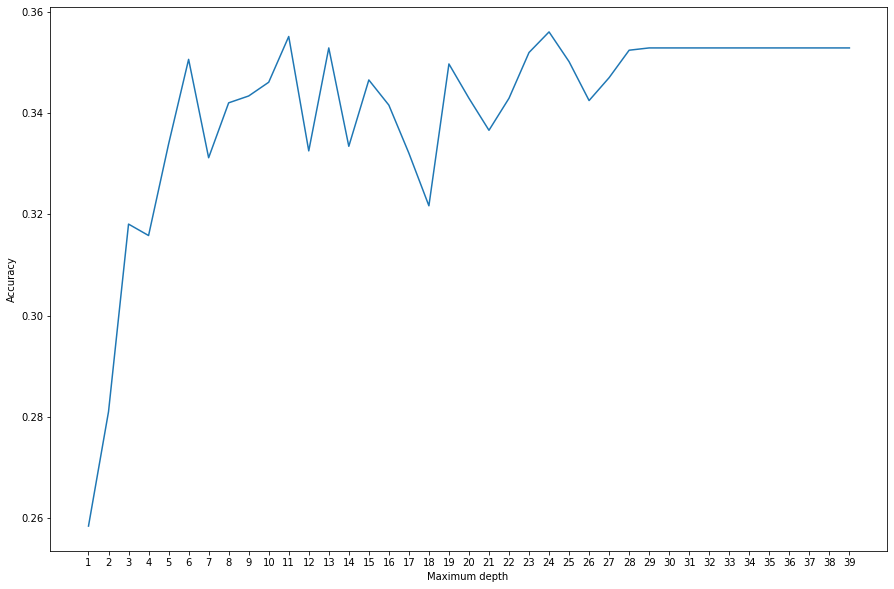

In [ ]:
import matplotlib.pyplot as plt
loc = np.arange(1,40)
plt.figure(figsize = (15, 10))
plt.plot(range(1,40), acc_test_1)
plt.xticks(loc)
plt.xlabel('Maximum depth ')
plt.ylabel('Accuracy')
plt.show()

This gives us that we can take the maximum depth equal to 32 while having almost the best accuracy. So we'll stick to this value.

In [ ]:
from sklearn import metrics
#calculating the accuracy of the model with different values of k
acc_test_1 = []
for i in range(2,50,5):
    CLFFF = RandomForestClassifier(min_samples_split= i, max_depth=32, random_state=0).fit(train_embeddings, train_labels)
    test_predictions = CLFFF.predict(test_embeddings)
    acc_test_1.append(accuracy_score(test_labels, test_predictions))    
    print(i)

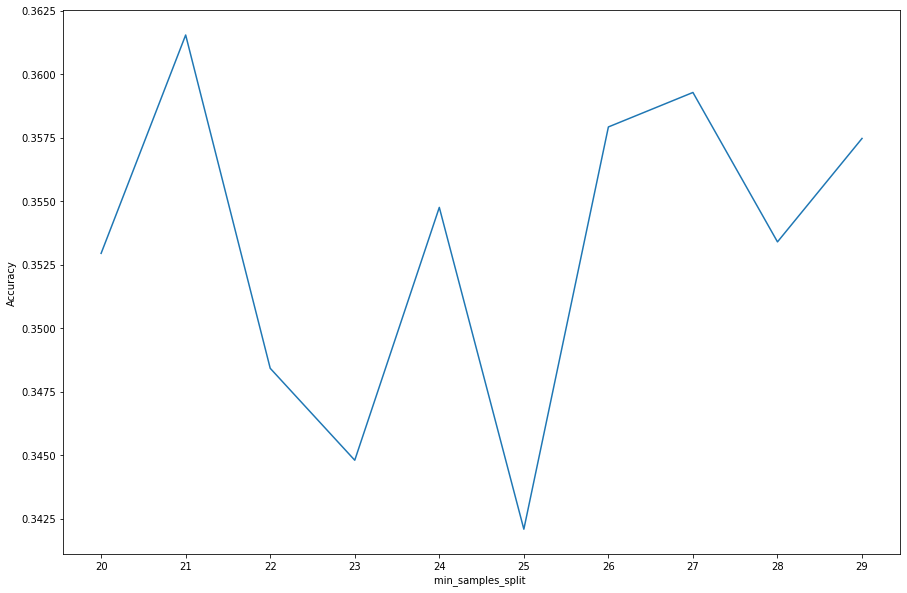

In [ ]:
import matplotlib.pyplot as plt
loc = np.arange(20,30)
plt.figure(figsize = (15, 10))
plt.plot(range(20,30), acc_test_1)
plt.xticks(loc)
plt.xlabel('min_samples_split ')
plt.ylabel('Accuracy')
plt.show()

We see that it doesn't really follow a pattern. But the variance isn't huge. That is the case for the other hyperparameters such as: criterion, max_features.... 

In [ ]:
#Determine the number of estimators:
acc_test_1 = []
for i in range(102,2104,500):
    CLFFF = RandomForestClassifier(n_estimators= i, max_depth=3, random_state=0).fit(train_embeddings, train_labels)
    test_predictions = CLFFF.predict(test_embeddings)
    acc_test_1.append(accuracy_score(test_labels, test_predictions))    
    print(i)

102
602
1102
1602
2102


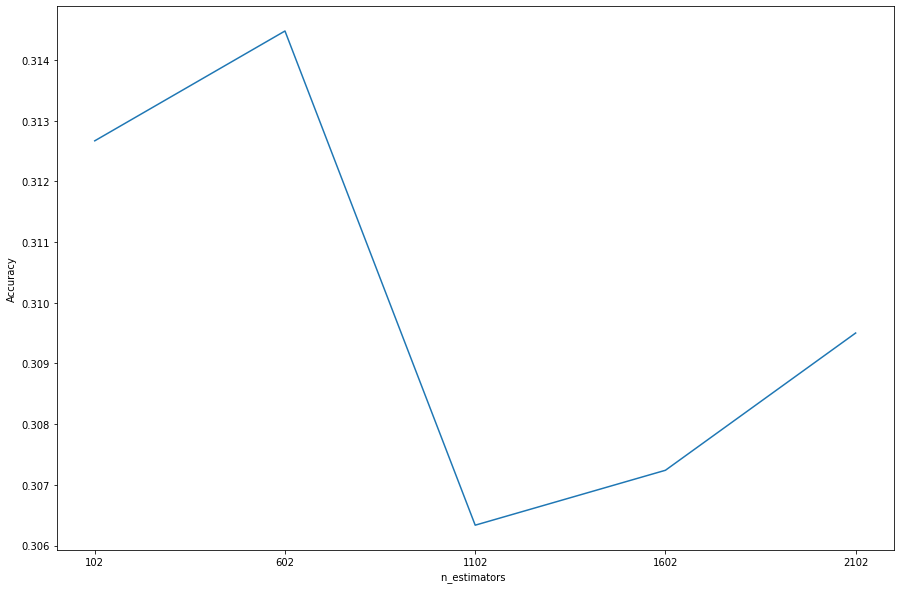

In [ ]:
import matplotlib.pyplot as plt
loc = np.arange(102,2104,500)
plt.figure(figsize = (15, 10))
plt.plot(range(102,2104,500), acc_test_1)
plt.xticks(loc)
plt.xlabel('n_estimators ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
acc_test_1 = []
for i in range(102,1004,100):
    CLFFF = RandomForestClassifier(n_estimators= i, max_depth=3, random_state=0).fit(train_embeddings, train_labels)
    test_predictions = CLFFF.predict(test_embeddings)
    acc_test_1.append(accuracy_score(test_labels, test_predictions))    
    print(i)

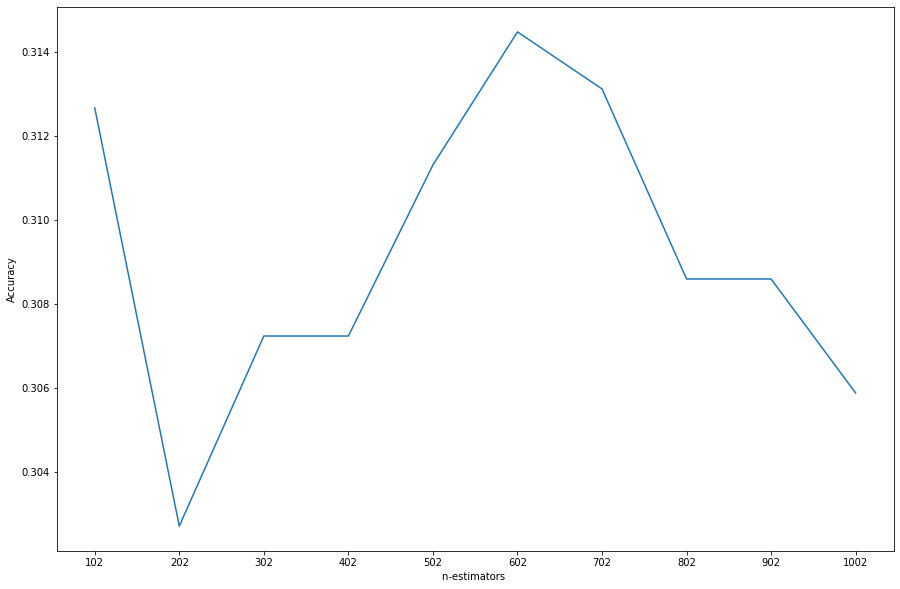

In [ ]:
import matplotlib.pyplot as plt
loc = np.arange(102,1004,100)
plt.figure(figsize = (15, 10))
plt.plot(range(102,1004,100), acc_test_1)
plt.xticks(loc)
plt.xlabel('n-estimators ')
plt.ylabel('Accuracy')
plt.show()

We see that we have a better accuracy than for the default case 100 so we'll try to obtain an approximation to the best number even if that induces a greater computational time and does not implicate a big difference in accuracy.

In [ ]:
acc_test_1 = []
for i in range(502,704,50):
    CLFFF = RandomForestClassifier(n_estimators= i, max_depth=3, random_state=0).fit(train_embeddings, train_labels)
    test_predictions = CLFFF.predict(test_embeddings)
    acc_test_1.append(accuracy_score(test_labels, test_predictions))    
    print(i)

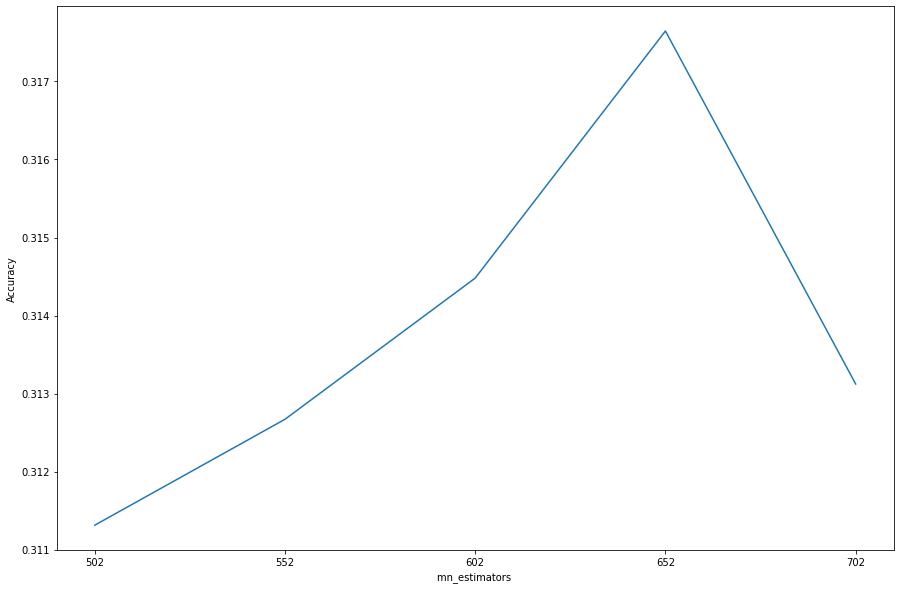

In [ ]:
import matplotlib.pyplot as plt
loc = np.arange(502,704,50)
plt.figure(figsize = (15, 10))
plt.plot(range(502,704,50), acc_test_1)
plt.xticks(loc)
plt.xlabel('mn_estimators ')
plt.ylabel('Accuracy')
plt.show()

finally, we'll choose n_estimators equal to 600.

In [ ]:
#Random Forest Mohamed
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import time 
start=time.time()
clf = RandomForestClassifier(min_samples_split= 20 ,n_estimators=600,max_depth=32,  random_state=0)
clf.fit(train_embeddings, train_labels)

dev_predictions = clf.predict(validation_embeddings)
acc_dev = accuracy_score(dev_labels, dev_predictions)

test_predictions = clf.predict(test_embeddings)
acc_test = accuracy_score(test_labels, test_predictions)

f1_dev_macro = f1_score(dev_labels, dev_predictions, average="macro")
f1_dev_micro = f1_score(dev_labels, dev_predictions, average="micro")
f1_dev_weighted = f1_score(dev_labels, dev_predictions, average="weighted")
f1_test_macro = f1_score(test_labels, test_predictions, average="macro")
f1_test_micro = f1_score(test_labels, test_predictions, average = "micro")
f1_test_weighted = f1_score(test_labels, test_predictions, average="weighted")

end = time.time()
print( 'total time :', end  - start)
print('Dev acc: ', acc_dev)
print('Test acc: ', acc_test)
print('f1 dev macro: ', f1_dev_macro)
print('f1 dev micro: ', f1_dev_micro)
print('f1_dev_weighted:' ,f1_dev_weighted)
print('f1 test macro: ', f1_test_macro)
print('f1 test micro: ', f1_test_micro)
print('f1_test_weighted:' ,f1_test_weighted)

total time : 45.41165375709534
Dev acc:  0.37693006357856496
Test acc:  0.3719457013574661
f1 dev macro:  0.3759435007258247
f1 dev micro:  0.37693006357856496
f1_dev_weighted: 0.3627016845106787
f1 test macro:  0.3682150104408772
f1 test micro:  0.3719457013574661
f1_test_weighted: 0.3652741064067921
